# Load libraries

In [1]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_XLA_FLAGS'] = '--tf_xla_cpu_global_jit'

print("Plot libraries")
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm
import seaborn as sns


print("Computing libraries")
import pandas as pd
import numpy as np


print("Root libraries")
import ROOT
import uproot


from tqdm.notebook import tqdm


print("Tensorflow libraries")
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from kerastuner.tuners import RandomSearch, BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters


print("Sklearn libraries")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, matthews_corrcoef

import joblib

Plot libraries
Computing libraries
Root libraries
Welcome to JupyROOT 6.30/04
Tensorflow libraries


2024-07-11 15:40:04.544232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sklearn libraries


# Config CPU/GPU

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

tf.config.optimizer.set_jit(True)


tf.config.threading.set_inter_op_parallelism_threads(4)  # Adjust the number of threads as needed
tf.config.threading.set_intra_op_parallelism_threads(4)  # Adjust the number of threads as needed

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5418856595645099700
xla_global_id: -1
]


# Config

In [3]:
plot_data = False
limits = False



polarisation = ["W0_vs_WT","Z0_vs_ZT","W0Z0_vs_others","W0ZT_vs_others","WTZ0_vs_others","WTZT_vs_others"]
which_polarisation = 2
name_dnn = polarisation[which_polarisation]


factor = 1

In [4]:
path_fig = f'../Fig/3D_map_{name_dnn}/'
if not os.path.exists(path_fig):
        os.makedirs(path_fig)

folder = []

for i in folder:
    if not os.path.exists(path_fig+i):
        os.makedirs(path_fig+i)

# Load DATA

In [5]:
parameters = []
label = []
limite_m = []
limite_p = []

with open("/eos/user/m/mdubau/SWAN_projects/wz-dnn/variables.txt", "r") as file_variables:
    for line in file_variables:
        columns = line.split(";")
        parameters.append(columns[0])
        limite_m.append(float(columns[1]))
        limite_p.append(float(columns[2]))

    

print("Variables")
for i in range(len(parameters)):
    print(parameters[i])
        


    
print("\n")
print("Number of parameters      : ",len(parameters))

Variables
Njets
mJJ
Deta_jj
Dphi_jj
eta_W
Pt_W
Pt_Z
Ptjet1
Etajet1
Phijet1
centrality_jet
centrality
DR_jZ
Ptjet2
MtWZ
aZylW
cosThetaZ_rec
cosThetaW_rec
RpThard2
Etajet2
Phijet2
pt1
eta1
pt2
eta2
pt3
eta3
phi1
phi2
phi3
cosThetaV_rec
WZpT_rec
MET
ZlepDPhi
WlepDPhi
Ejet1
Ejet2
pTjMean_rec
ApTj_rec
r21_rec
cosThetaVjj_rec


Number of parameters      :  41


In [6]:
files_names = """
histo.run2.WZlllnu_MGH7EG_EW_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_WTZTPol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_noSkim.root;
histo.run2.WZlllnu_Sherpa2212_EW_noSkim.root;
histo.run2.ZZ_MGPy8EG_EW.root;
histo.run2.VVV_Sherpa.root;
histo.run2.WZlllnu_MGPy8EG_CKKWL_LO_W0Z0Pol_V3.root;
histo.run2.WZlllnu_MGPy8EG_CKKWL_LO_W0ZTPol_V3.root;
histo.run2.WZlllnu_MGPy8EG_CKKWL_LO_WTZ0Pol_V3.root;
histo.run2.WZlllnu_MGPy8EG_CKKWL_LO_WTZTPol_V3.root;
histo.run2.WZlllnu_MGPy8EG_NLO_Ext.root;
histo.run2.WZlllnu_Sherpa2212_noSkim.root;
histo.run2.ZZ_Sherpa222.root;
histo.run2.Zgamma_Sherpa224.root;
histo.run2.Zll_PowHeg.root;
histo.run2.tZ_aMcAtNloPythia.root;
histo.run2.ttbarV_aMCatNLO.root;
histo.run2.ttbar_PowHegPythia8.root;
"""


files_names = """
histo.run2.WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim.root;
histo.run2.WZlllnu_MGPy8EG_EW_WTZTPol_noSkim.root;
histo.run2.ZZ_MGPy8EG_EW.root;
histo.run2.VVV_Sherpa.root;
histo.run2.WZlllnu_MGPy8EG_NLO_Ext.root;
histo.run2.ZZ_Sherpa222.root;
histo.run2.Zgamma_Sherpa224.root;
histo.run2.Zll_PowHeg.root;
histo.run2.tZ_aMcAtNloPythia.root;
histo.run2.ttbarV_aMCatNLO.root;
histo.run2.ttbar_PowHegPythia8.root;
"""




files_list = [name.strip() for name in files_names.split(';') if name.strip()]
files_list_simple = [name.replace("histo.run2.", "").replace(".root", "") for name in files_list]

print(files_list)

['histo.run2.WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim.root', 'histo.run2.WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim.root', 'histo.run2.WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim.root', 'histo.run2.WZlllnu_MGPy8EG_EW_WTZTPol_noSkim.root', 'histo.run2.ZZ_MGPy8EG_EW.root', 'histo.run2.VVV_Sherpa.root', 'histo.run2.WZlllnu_MGPy8EG_NLO_Ext.root', 'histo.run2.ZZ_Sherpa222.root', 'histo.run2.Zgamma_Sherpa224.root', 'histo.run2.Zll_PowHeg.root', 'histo.run2.tZ_aMcAtNloPythia.root', 'histo.run2.ttbarV_aMCatNLO.root', 'histo.run2.ttbar_PowHegPythia8.root']


In [7]:
def load_data(file_path, parameters):
    print("Loading file : ",file_path)
    
    with uproot.open(file_path + ":ntWZVBS_SR_KinRecGen") as file_tree:
        data = file_tree.arrays(parameters+["Weight"], library="pd")
        
    return np.array(data)


path = "/eos/user/m/mdubau/samples/VBS/"


data_list = []

for i in files_list:
    data_temp = load_data(path+i,parameters)
    
    indices = np.where(data_temp[:,parameters.index("MtWZ")] <= 5000)[0]
    data_temp = data_temp[indices]
    
    data_list.append(data_temp)
    

print(len(data_list))

Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.WZlllnu_MGPy8EG_EW_WTZTPol_noSkim.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.ZZ_MGPy8EG_EW.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.VVV_Sherpa.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.WZlllnu_MGPy8EG_NLO_Ext.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.ZZ_Sherpa222.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.Zgamma_Sherpa224.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.Zll_PowHeg.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.tZ_aMcAtNloPythia.root
Loading file :  /eos/user/m/mdubau/samples/VBS/histo.run2.ttbar

## Process DATA

In [8]:
polarisation_scaler = joblib.load(f"../Weights/DNN3_{name_dnn}_scaler.save")
WZ_scaler = joblib.load(f"../Weights/DNN3_WZ_vs_others_WW_scaler.save")
EW_QCD_scaler = joblib.load(f"../Weights/DNN3_EW_vs_QCD_scaler.save")


polarisation_model = keras.models.load_model(f'../Weights/DNN3_{name_dnn}_weights.h5')
WZ_model = keras.models.load_model(f"../Weights/DNN3_WZ_vs_others_WW_weights.h5")
EW_QCD_model = keras.models.load_model(f"../Weights/DNN3_EW_vs_QCD_weights.h5")

In [9]:
polarisation_pred = []
WZ_pred = []
EW_QCD_pred = []
weight = []


for idx,i in enumerate(data_list):
    print(f"File : {files_list_simple[idx]}  --  Data : {i.shape} \n")
    
    i_weight = i[:,41]
    
    if factor != 1:
        i_weight = i_weight * factor/139
    
    weight.append(i_weight)
    i_data = np.delete(i,41,axis=1)
    
    i_WZ = np.copy(i_data)
    i_WZ = WZ_scaler.transform(i_WZ)
    i_WZ_pred = WZ_model.predict_on_batch(i_WZ)
    WZ_pred.append(i_WZ_pred)
    
    
    i_EW_QCD = np.copy(i_data)
    i_EW_QCD = EW_QCD_scaler.transform(i_EW_QCD)
    i_EW_QCD_pred = EW_QCD_model.predict_on_batch(i_EW_QCD)
    EW_QCD_pred.append(i_EW_QCD_pred)
    
    
    i_polarisation = np.copy(i_data)
    i_polarisation = polarisation_scaler.transform(i_polarisation)
    i_polarisation_pred = polarisation_model.predict_on_batch(i_polarisation)
    polarisation_pred.append(i_polarisation_pred)
    
    print("\n =============================================================== \n")

File : WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim  --  Data : (17744, 42) 



File : WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim  --  Data : (36842, 42) 



File : WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim  --  Data : (39018, 42) 



File : WZlllnu_MGPy8EG_EW_WTZTPol_noSkim  --  Data : (104117, 42) 



File : ZZ_MGPy8EG_EW  --  Data : (133097, 42) 



File : VVV_Sherpa  --  Data : (4518, 42) 



File : WZlllnu_MGPy8EG_NLO_Ext  --  Data : (203182, 42) 



File : ZZ_Sherpa222  --  Data : (56064, 42) 



File : Zgamma_Sherpa224  --  Data : (54, 42) 



File : Zll_PowHeg  --  Data : (29, 42) 



File : tZ_aMcAtNloPythia  --  Data : (168819, 42) 



File : ttbarV_aMCatNLO  --  Data : (21388, 42) 



File : ttbar_PowHegPythia8  --  Data : (85, 42) 





In [10]:
for idx,i in enumerate(data_list):
    print(f"File : {files_list_simple[idx]}:")
    
    counts, bin_edges, _ = plt.hist(i[:,0], bins=50, weights=weight[idx])
        
    print(f" -- Data : {i.shape}")
    print(f" -- Integral : {np.sum(counts)}")
    
    print(f"================================ \n")
        
        
plt.close()

File : WZlllnu_MGPy8EG_EW_W0Z0Pol_noSkim:
 -- Data : (17744, 42)
 -- Integral : 8.747550903884985

File : WZlllnu_MGPy8EG_EW_W0ZTPol_noSkim:
 -- Data : (36842, 42)
 -- Integral : 19.515714964465587

File : WZlllnu_MGPy8EG_EW_WTZ0Pol_noSkim:
 -- Data : (39018, 42)
 -- Integral : 20.445321441162378

File : WZlllnu_MGPy8EG_EW_WTZTPol_noSkim:
 -- Data : (104117, 42)
 -- Integral : 59.6689775720879

File : ZZ_MGPy8EG_EW:
 -- Data : (133097, 42)
 -- Integral : 5.519033360513276

File : VVV_Sherpa:
 -- Data : (4518, 42)
 -- Integral : 2.349140204649302

File : WZlllnu_MGPy8EG_NLO_Ext:
 -- Data : (203182, 42)
 -- Integral : 332.3735956530436

File : ZZ_Sherpa222:
 -- Data : (56064, 42)
 -- Integral : 44.601878053625114

File : Zgamma_Sherpa224:
 -- Data : (54, 42)
 -- Integral : 0.7011015207972378

File : Zll_PowHeg:
 -- Data : (29, 42)
 -- Integral : 15.13685741275549

File : tZ_aMcAtNloPythia:
 -- Data : (168819, 42)
 -- Integral : 34.79103389183001

File : ttbarV_aMCatNLO:
 -- Data : (21388

  0%|          | 0/13 [00:00<?, ?it/s]

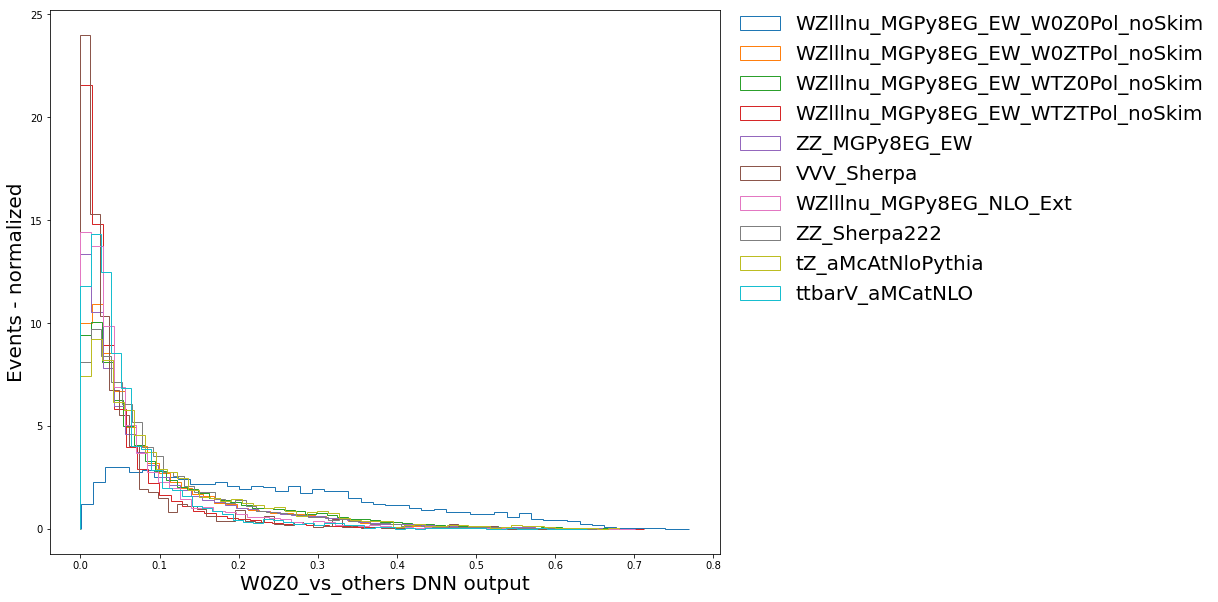

In [11]:
plt.figure(figsize=(12, 10))

for i in tqdm(range(len(files_list))):
    if i == 8 or i == 9 or i == 12:
        continue
    else:
        plt.hist(polarisation_pred[i][:,0], bins=50, weights=weight[i], label=files_list_simple[i], histtype='step', log=False, density=True)
    

    
plt.legend(bbox_to_anchor=(1.75, 1.025), frameon=False, fontsize=20)
plt.xlabel(f'{name_dnn} DNN output', fontsize=20)
plt.ylabel('Events - normalized', fontsize=20)
plt.savefig(path_fig + f"{name_dnn}_ouput.pdf", bbox_inches="tight")

  0%|          | 0/13 [00:00<?, ?it/s]

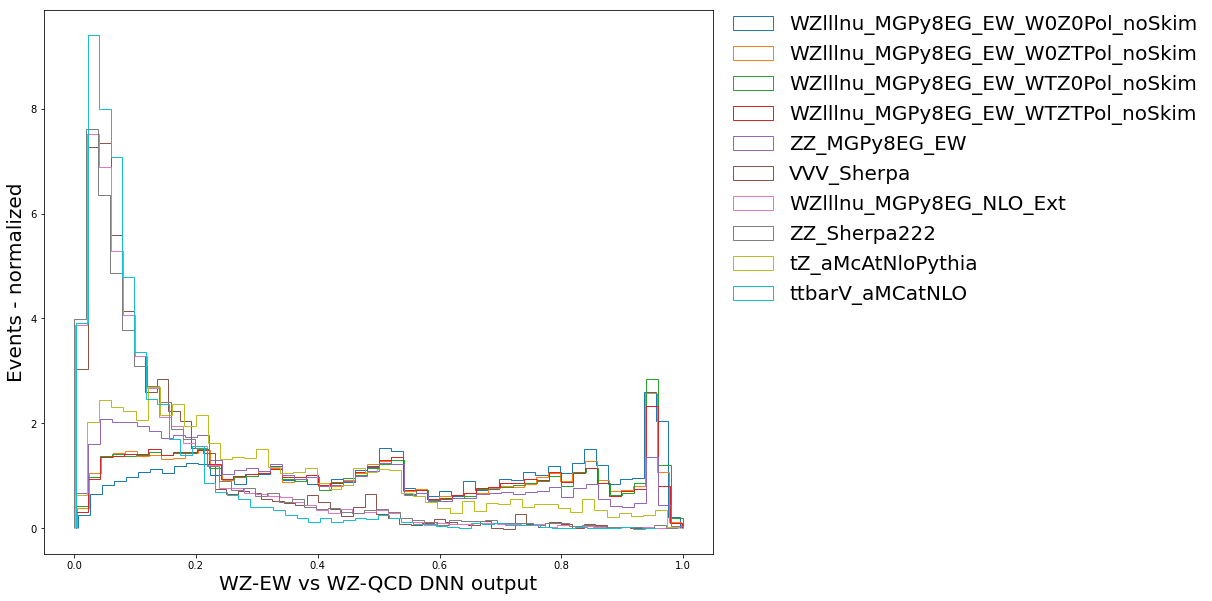

In [12]:
plt.figure(figsize=(12, 10))

for i in tqdm(range(len(files_list))):
    if i == 8 or i == 9 or i == 12:
        continue
    else:
        plt.hist(EW_QCD_pred[i][:,0], bins=50, weights=weight[i], label=files_list_simple[i], histtype='step', log=False, density=True)
    

    
plt.legend(bbox_to_anchor=(1.75, 1.025), frameon=False, fontsize=20)
plt.xlabel('WZ-EW vs WZ-QCD DNN output', fontsize=20)
plt.ylabel('Events - normalized', fontsize=20)
plt.savefig(path_fig + f"EW_vs_QCD_ouput.pdf", bbox_inches="tight")

  0%|          | 0/13 [00:00<?, ?it/s]

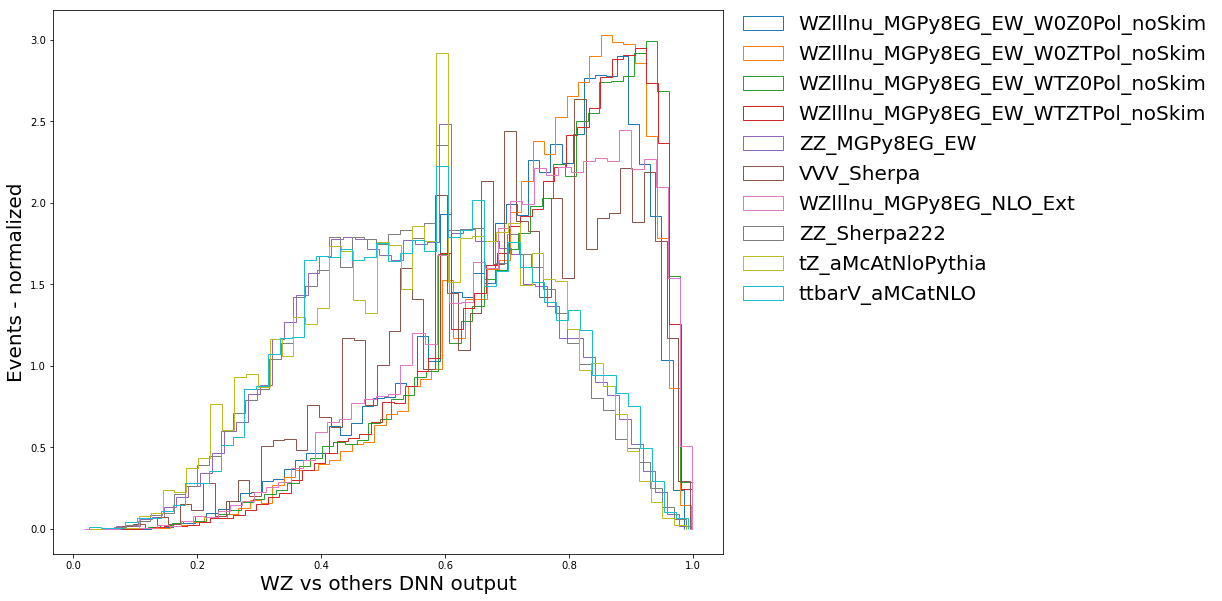

In [13]:
plt.figure(figsize=(12, 10))

for i in tqdm(range(len(files_list))):
    if i == 8 or i == 9 or i == 12:
        continue
    else:
        plt.hist(WZ_pred[i][:,0], bins=50, weights=weight[i], label=files_list_simple[i], histtype='step', log=False, density=True)
    

    
plt.legend(bbox_to_anchor=(1.75, 1.025), frameon=False, fontsize=20)
plt.xlabel('WZ vs others DNN output', fontsize=20)
plt.ylabel('Events - normalized', fontsize=20)
plt.savefig(path_fig + f"WZ_vs_others_ouput.pdf", bbox_inches="tight")

In [14]:
if factor != 1:
    name_dnn += "_"+str(factor)

  0%|          | 0/13 [00:00<?, ?it/s]

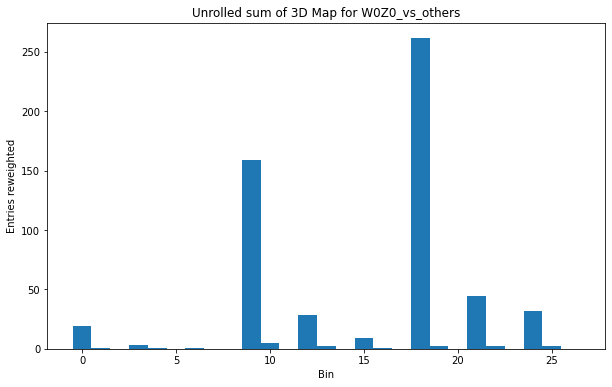

ROOT file done


In [15]:
root_file = ROOT.TFile(path_fig+f"3D_map_{name_dnn}.root", "RECREATE")

dir_3D = root_file.mkdir("3D_maps")
dir_unrolled = root_file.mkdir("3D_maps_unrolled")

                       
                       
bins = 3
range_x = (0, 1)
range_y = (0, 1)
range_z = (0, 1)


hist_name_3D_sum = f"3D_map_sum_{name_dnn}"
hist_title_3D_sum = f"3D_map_sum_{name_dnn}"   
hist_3D_sum = ROOT.TH3F(hist_name_3D_sum, hist_title_3D_sum, bins, range_x[0], range_x[1], bins, range_y[0], range_y[1], bins, range_z[0], range_z[1])


hist_name_unrolled_sum = f"3D_map_unrolled_sum_{name_dnn}"
hist_title_unrolled_sum = f"3D_map_unrolled_sum_{name_dnn}"   
hist_unrolled_sum = ROOT.TH1F(hist_name_unrolled_sum, hist_title_unrolled_sum, bins*bins*bins, 0, bins*bins*bins)
    
    
    
for i in tqdm(range(len(files_list))):
    
    hist_name_3D = f"3D_map_{files_list_simple[i]}_{name_dnn}"
    hist_title_3D = f"3D_map_{files_list_simple[i]}_{name_dnn}"
    hist_3D = ROOT.TH3F(hist_name_3D, hist_title_3D, bins, range_x[0], range_x[1], bins, range_y[0], range_y[1], bins, range_z[0], range_z[1])

    
    hist_name_unrolled = f"3D_map_unrolled_{files_list_simple[i]}_{name_dnn}"
    hist_title_unrolled = f"3D_map_unrolled_{files_list_simple[i]}_{name_dnn}"
    hist_unrolled = ROOT.TH1F(hist_name_unrolled, hist_title_unrolled, bins*bins*bins, 0, bins*bins*bins)



    for xi, yi, zi, wi in zip(polarisation_pred[i][:,0], EW_QCD_pred[i][:,0], WZ_pred[i][:,0], weight[i]):    
        hist_3D.Fill(xi, yi, zi, wi)
        
        bin_x = hist_3D.GetXaxis().FindBin(xi) - 1
        bin_y = hist_3D.GetYaxis().FindBin(yi) - 1
        bin_z = hist_3D.GetZaxis().FindBin(zi) - 1
        
        bin_1d = bin_x + bin_y * bins + bin_z * bins * bins
    
        hist_unrolled.Fill(bin_1d, wi)
        
        
        

    bins_x = hist_3D.GetNbinsX()
    bins_y = hist_3D.GetNbinsY()
    bins_z = hist_3D.GetNbinsZ()

    for bin_x in range(1, bins_x + 1):
        for bin_y in range(1, bins_y + 1):
            for bin_z in range(1, bins_z + 1):
                bin_content = hist_3D.GetBinContent(bin_x, bin_y, bin_z)
                if bin_content < 0:
                    hist_3D.SetBinContent(bin_x, bin_y, bin_z, 0)

                    bin_1d = (bin_x - 1) + (bin_y - 1) * bins_x + (bin_z - 1) * bins_x * bins_y

                    if hist_unrolled.GetBinContent(bin_1d + 1) < 0:
                        hist_unrolled.SetBinContent(bin_1d + 1, 0)

        


    
    hist_3D_sum.Add(hist_3D)
    hist_unrolled_sum.Add(hist_unrolled)
    
    dir_3D.cd()
    hist_3D.SetXTitle(f"{name_dnn}")
    hist_3D.SetYTitle("EW vs QCD")
    hist_3D.SetZTitle("WZ vs others")
    hist_3D.Write()
    
    dir_unrolled.cd()
    hist_unrolled.SetXTitle("Bins")
    hist_unrolled.SetYTitle("Entries")
    hist_unrolled.Write()

    
    
dir_3D.cd()
hist_3D.SetXTitle(f"{name_dnn}")
hist_3D.SetYTitle("EW vs QCD")
hist_3D.SetZTitle("WZ vs others")
hist_3D_sum.Write()

dir_unrolled.cd()
hist_unrolled_sum.SetXTitle("Bins")
hist_unrolled_sum.SetYTitle("Entries")
hist_unrolled_sum.Write()



bin_contents = np.array([hist_unrolled_sum.GetBinContent(i+1) for i in range(hist_unrolled_sum.GetNbinsX())])
bin_edges = np.array([hist_unrolled_sum.GetBinLowEdge(i+1) for i in range(hist_unrolled_sum.GetNbinsX()+1)])


plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], bin_contents, width=np.diff(bin_edges))
plt.xlabel('Bin')
plt.ylabel('Entries reweighted')
plt.title(f'Unrolled sum of 3D Map for {name_dnn}')
plt.savefig(path_fig + f"unrolled_3D_map_sum_{name_dnn}.pdf")
plt.show()


    
root_file.Close()

print("ROOT file done")

